# Diabetes Dataset - Complete Data Cleaning and Analysis

This notebook combines all data cleaning and analysis steps for the diabetes dataset:
1. Initial data exploration (script.py)
2. Data cleaning - handling missing values (script2.py)
3. Outlier detection and removal (script3.py)
4. Correlation analysis and visualization (chart_script.py)

## Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px

# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

print("Dataset successfully loaded!")
print(f"Shape: {df.shape}")

Dataset successfully loaded!
Shape: (768, 9)


## Step 2: Initial Data Exploration (from script.py)

In [2]:
# Display basic information about the dataset
print("Dataset Overview:")
print("="*50)
print(f"Shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

Dataset Overview:
Shape: (768, 9)

Column names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 colum

## Step 3: Data Cleaning - Check for Missing Values (from script2.py)

In [3]:
# Data Cleaning - Check for missing values and data issues
print("Data Cleaning Analysis:")
print("="*50)
print("Missing values in each column:")
print(df.isnull().sum())

# Check for zero values that might indicate missing data
print("\nZero values in each column (potential missing data):")
zero_counts = (df == 0).sum()
print(zero_counts)

# Identify columns that shouldn't have zero values biologically
problematic_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nProblematic zero values (should not be zero biologically):")
for col in problematic_zeros:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    print(f"{col}: {zero_count} zeros ({zero_percentage:.2f}%)")

Data Cleaning Analysis:
Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero values in each column (potential missing data):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Problematic zero values (should not be zero biologically):
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


## Step 4: Replace Zeros with NaN and Impute Missing Values

In [4]:
# Replace zeros with NaN for problematic columns (except Insulin where 0 might be valid)
df_cleaned = df.copy()
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df_cleaned[col] = df_cleaned[col].replace(0, np.nan)

print("After replacing zeros with NaN:")
print(df_cleaned.isnull().sum())

# Replace missing values with median (more robust for outliers)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    median_value = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_value)
    print(f"Filled {col} missing values with median: {median_value}")

print("\nFinal missing values check:")
print(df_cleaned.isnull().sum())

After replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Filled Glucose missing values with median: 117.0
Filled BloodPressure missing values with median: 72.0
Filled SkinThickness missing values with median: 29.0
Filled BMI missing values with median: 32.3

Final missing values check:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Step 5: Outlier Detection (from script3.py)

In [5]:
# Outlier Detection and Removal using IQR method
print("Outlier Detection and Removal:")
print("="*50)

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in each numerical column
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.drop('Outcome')
outlier_info = {}

print("Outlier analysis for each column:")
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df_cleaned, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_cleaned)) * 100
    outlier_info[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%), Range: [{lower:.2f}, {upper:.2f}]")

Outlier Detection and Removal:
Outlier analysis for each column:
Pregnancies: 4 outliers (0.52%), Range: [-6.50, 13.50]
Glucose: 0 outliers (0.00%), Range: [39.00, 201.00]
BloodPressure: 14 outliers (1.82%), Range: [40.00, 104.00]
SkinThickness: 87 outliers (11.33%), Range: [14.50, 42.50]
Insulin: 34 outliers (4.43%), Range: [-190.88, 318.12]
BMI: 8 outliers (1.04%), Range: [13.85, 50.25]
DiabetesPedigreeFunction: 29 outliers (3.78%), Range: [-0.33, 1.20]
Age: 9 outliers (1.17%), Range: [-1.50, 66.50]


## Step 6: Remove Outliers

In [6]:
# Remove outliers (keeping moderate approach - only remove extreme outliers)
df_no_outliers = df_cleaned.copy()
initial_size = len(df_no_outliers)

# Remove outliers for selected columns with high outlier counts
cols_to_clean = ['Insulin', 'BMI', 'DiabetesPedigreeFunction']
for col in cols_to_clean:
    if outlier_info[col]['count'] > 0:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & 
                                       (df_no_outliers[col] <= upper_bound)]

final_size = len(df_no_outliers)
removed_rows = initial_size - final_size
print(f"\nRows removed due to outliers: {removed_rows} ({(removed_rows/initial_size)*100:.2f}%)")
print(f"Final dataset size: {final_size}")

# Save cleaned data
df_no_outliers.to_csv('diabetes_cleaned.csv', index=False)
print("\nCleaned data saved as 'diabetes_cleaned.csv'")


Rows removed due to outliers: 72 (9.38%)
Final dataset size: 696

Cleaned data saved as 'diabetes_cleaned.csv'


## Step 7: Correlation Analysis (from chart_script.py)

In [7]:
# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
print("Data types:")
print(df.dtypes)

# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()
print("Correlation matrix shape:", correlation_matrix.shape)

Dataset shape: (768, 9)
Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Correlation matrix shape: (9, 9)


## Step 8: Create Interactive Correlation Heatmap

In [8]:
# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',  # Diverging colormap (red-blue)
    zmin=-1,
    zmax=1,
    text=np.round(correlation_matrix.values, 2),  # Show correlation values
    texttemplate='%{text}',
    textfont={'size': 10},
    showscale=True,
    colorbar=dict(title='Correlation')
))

# Update layout
fig.update_layout(
    title='Diabetes Dataset Correlation Matrix',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=800,
    height=800
)

# Make sure the plot is square and readable
fig.update_xaxes(side='bottom')
fig.update_yaxes(autorange='reversed')

# Display the plot
fig.show()

# Save the chart as both PNG and SVG
fig.write_image('correlation_heatmap.png')
fig.write_image('correlation_heatmap.svg', format='svg')

print("Chart saved successfully!")

Chart saved successfully!


## Step 9: Alternative - Static Matplotlib Heatmap

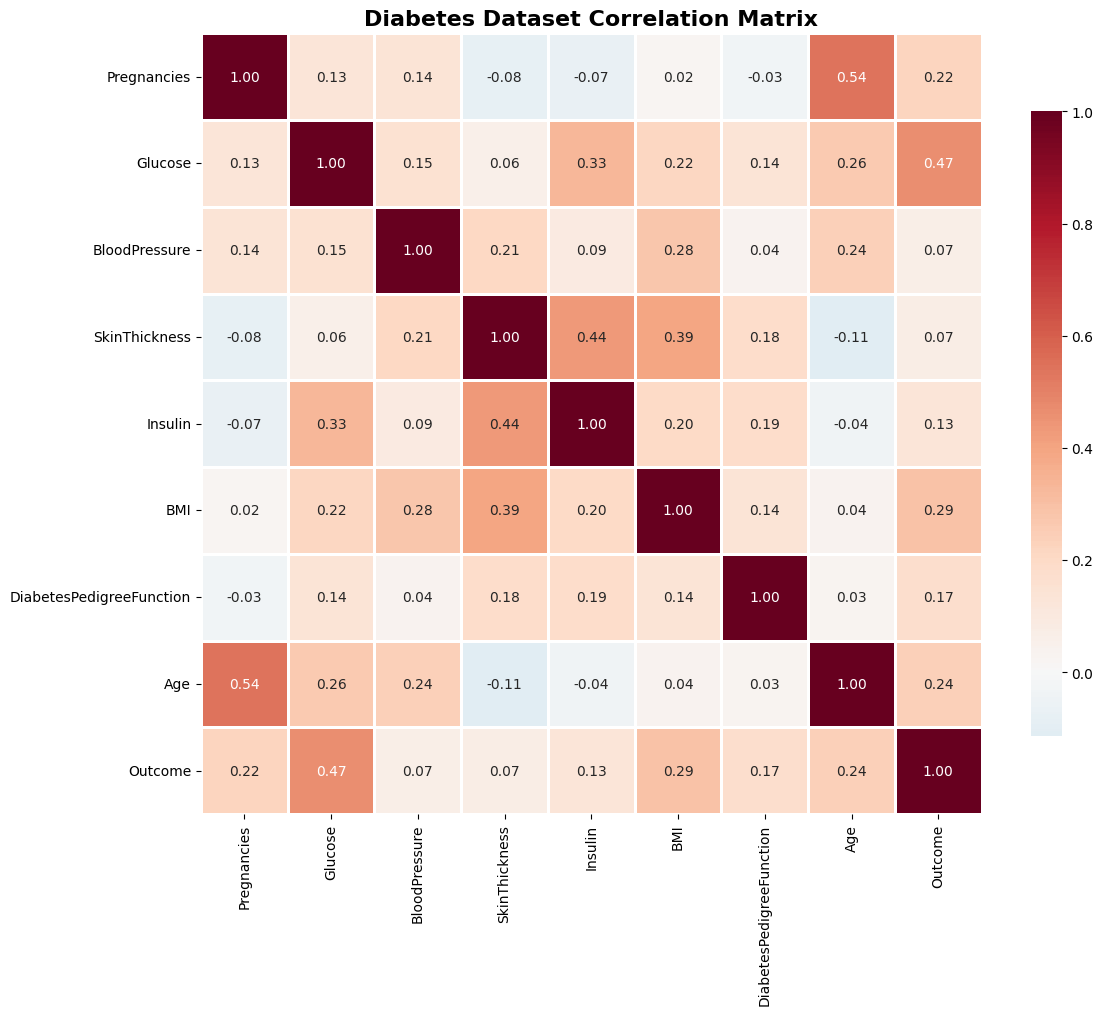

In [9]:
# Create a static heatmap using seaborn (alternative to plotly)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Diabetes Dataset Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Summary

This notebook combined all the data cleaning and analysis steps:

1. **Data Exploration**: Examined the dataset structure and basic statistics
2. **Missing Values**: Identified zero values representing missing data
3. **Data Imputation**: Replaced zeros with NaN and filled with median values
4. **Outlier Detection**: Used IQR method to identify outliers
5. **Outlier Removal**: Removed extreme outliers from selected columns
6. **Correlation Analysis**: Created correlation matrix and visualizations
7. **Export**: Saved cleaned dataset to 'diabetes_cleaned.csv'

The cleaned dataset is now ready for machine learning modeling!